In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
name_basics = pd.read_csv(r'C:\Users\Harsh\Datasets\namebasics.csv')
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


In [3]:
title_ratings = pd.read_csv(r"C:\Users\Harsh\Datasets\titleratingstsv.csv")
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2136
1,tt0000002,5.5,289
2,tt0000003,6.4,2170
3,tt0000004,5.3,185
4,tt0000005,6.2,2902


In [4]:
title_crew = pd.read_csv(r"C:\Users\Harsh\Datasets\titlecrew.csv")
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [5]:
title_principals = pd.read_csv(r"C:\Users\Harsh\Datasets\titleprincipals.csv")
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


In [6]:
title_basics =  pd.read_csv(r"C:\Users\Harsh\Datasets\titlebasics")
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [7]:
datasets = {'name_basics': name_basics, 'title_basics': title_basics, 'title_ratings': title_ratings, 'title_crew': title_crew, 'title_principals': title_principals}

for name, df in datasets.items():
    print(f"\n{name} Missing Values:\n{df.isnull().sum()}")


name_basics Missing Values:
nconst               0
primaryName          1
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64

title_basics Missing Values:
tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

title_ratings Missing Values:
tconst           0
averageRating    0
numVotes         0
dtype: int64

title_crew Missing Values:
tconst       0
directors    0
writers      0
dtype: int64

title_principals Missing Values:
tconst        0
ordering      0
nconst        0
category      0
job           0
characters    0
dtype: int64


### Handle Missing Data
Dropping Unnecessary Columns: Removing columns that aren’t useful.
Filling Missing Values:"Unknown" for text data, median for numeric data.

#### Filling missing values for categorical columns with "Unknown"

In [8]:

name_basics.fillna("Unknown", inplace=True)
title_basics.fillna("Unknown", inplace=True)
title_crew.fillna("Unknown", inplace=True)
title_principals.fillna("Unknown", inplace=True)

#### Filling missing values for numerical columns only in title_ratings

In [9]:
numeric_cols = title_ratings.select_dtypes(include=['number']).columns
title_ratings[numeric_cols] = title_ratings[numeric_cols].fillna(title_ratings[numeric_cols].median())

Before diving into deeper analysis, let's ensure data types are correct.


In [10]:
print(name_basics.dtypes)

nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtype: object


In [11]:
print(title_basics.dtypes)

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult            int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object


In [12]:
print(title_ratings.dtypes)

tconst            object
averageRating    float64
numVotes           int64
dtype: object


In [13]:
print(title_crew.dtypes)

tconst       object
directors    object
writers      object
dtype: object


In [14]:
print(title_principals.dtypes)

tconst        object
ordering       int64
nconst        object
category      object
job           object
characters    object
dtype: object


#### Here I am Converting numerical columns stored as strings (e.g., startYear, numVotes, averageRating) to proper formats:

In [15]:
def display_info(df, name):
    print(f"\n{name} Info:")
    print(df.info())
    print(f"\n{name} Sample:")
    print(df.head())

display_info(title_basics, "Title Basics")
display_info(name_basics, "Name Basics")
display_info(title_principals, "Title Principals")
display_info(title_crew, "Title Crew")
display_info(title_ratings, "Title Ratings")


Title Basics Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1048575 non-null  object
 1   titleType       1048575 non-null  object
 2   primaryTitle    1048575 non-null  object
 3   originalTitle   1048575 non-null  object
 4   isAdult         1048575 non-null  int64 
 5   startYear       1048575 non-null  object
 6   endYear         1048575 non-null  object
 7   runtimeMinutes  1048575 non-null  object
 8   genres          1048575 non-null  object
dtypes: int64(1), object(8)
memory usage: 72.0+ MB
None

Title Basics Sample:
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre

#### Replacing '\\N' with NaN

In [16]:
def replace_missing_values(df):
    return df.replace('\\N', np.nan)

title_basics = replace_missing_values(title_basics)
name_basics = replace_missing_values(name_basics)
title_principals = replace_missing_values(title_principals)
title_crew = replace_missing_values(title_crew)
title_ratings = replace_missing_values(title_ratings)

#### Checking missing values

In [17]:
def check_missing_values(df, name):
    print(f"\nMissing Values in {name}:")
    print(df.isnull().sum())

check_missing_values(title_basics, "Title Basics")
check_missing_values(name_basics, "Name Basics")
check_missing_values(title_principals, "Title Principals")
check_missing_values(title_crew, "Title Crew")
check_missing_values(title_ratings, "Title Ratings")


Missing Values in Title Basics:
tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear            8030
endYear           1024452
runtimeMinutes     464419
genres              65098
dtype: int64

Missing Values in Name Basics:
nconst                    0
primaryName               2
birthYear            790069
deathYear            906576
primaryProfession     43548
knownForTitles        35082
dtype: int64

Missing Values in Title Principals:
tconst             0
ordering           0
nconst             0
category           0
job           841870
characters    474189
dtype: int64

Missing Values in Title Crew:
tconst            0
directors    237733
writers      335709
dtype: int64

Missing Values in Title Ratings:
tconst           0
averageRating    0
numVotes         0
dtype: int64


#### Dropping unnecessary columns

In [18]:

title_basics = title_basics.drop(columns=['isAdult', 'endYear'])
name_basics = name_basics.drop(columns=['deathYear'])
title_principals = title_principals.drop(columns=['ordering', 'job', 'characters'])

In [19]:
# Merge title_ratings with title_basics
merged_df = pd.merge(title_basics, title_ratings, on='tconst', how='left')

# Merge title_principals
merged_df = pd.merge(merged_df, title_principals, on='tconst', how='left')

# Merge title_crew
merged_df = pd.merge(merged_df, title_crew, on='tconst', how='left')

# Merge with name_basics using nconst
final_df = pd.merge(merged_df, name_basics, left_on='nconst', right_on='nconst', how='left')

In [20]:
final_df.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,directors,writers,primaryName,birthYear,primaryProfession,knownForTitles
0,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2136.0,nm1588970,self,nm0005690,NaN,NaN,NaN,NaN,NaN
1,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2136.0,nm0005690,director,nm0005690,NaN,William K.L. Dickson,1860,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
2,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2136.0,nm0005690,producer,nm0005690,NaN,William K.L. Dickson,1860,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
3,tt0000001,short,Carmencita,Carmencita,1894,1,"Documentary,Short",5.7,2136.0,nm0374658,cinematographer,nm0005690,NaN,William Heise,1847,"cinematographer,director,producer","tt0241715,tt0285863,tt0286096,tt0229665"
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,5,"Animation,Short",5.5,289.0,nm0721526,director,nm0721526,NaN,Émile Reynaud,1844,"director,animation_department,producer","tt0000003,tt32169968,tt16763740,tt16763674"


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023208 entries, 0 to 2023207
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   tconst             object 
 1   titleType          object 
 2   primaryTitle       object 
 3   originalTitle      object 
 4   startYear          object 
 5   runtimeMinutes     object 
 6   genres             object 
 7   averageRating      float64
 8   numVotes           float64
 9   nconst             object 
 10  category           object 
 11  directors          object 
 12  writers            object 
 13  primaryName        object 
 14  birthYear          object 
 15  primaryProfession  object 
 16  knownForTitles     object 
dtypes: float64(2), object(15)
memory usage: 262.4+ MB


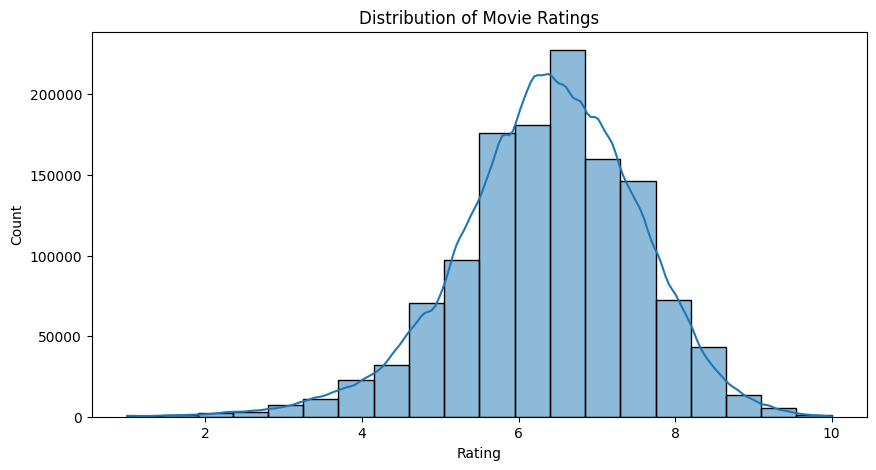

In [22]:
# Visualization 1: Distribution of Movie Ratings
plt.figure(figsize=(10, 5))
sns.histplot(final_df['averageRating'].dropna(), bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The first visualization shows the **distribution of IMDb movie ratings** using a histogram. The x-axis represents **ratings (1-10)**, while the y-axis represents the **number of movies** with each rating. The shape of the graph helps us see how ratings are spread—whether most movies are highly rated, poorly rated, or evenly distributed. The **smooth KDE curve** helps identify trends, making it easier to interpret.

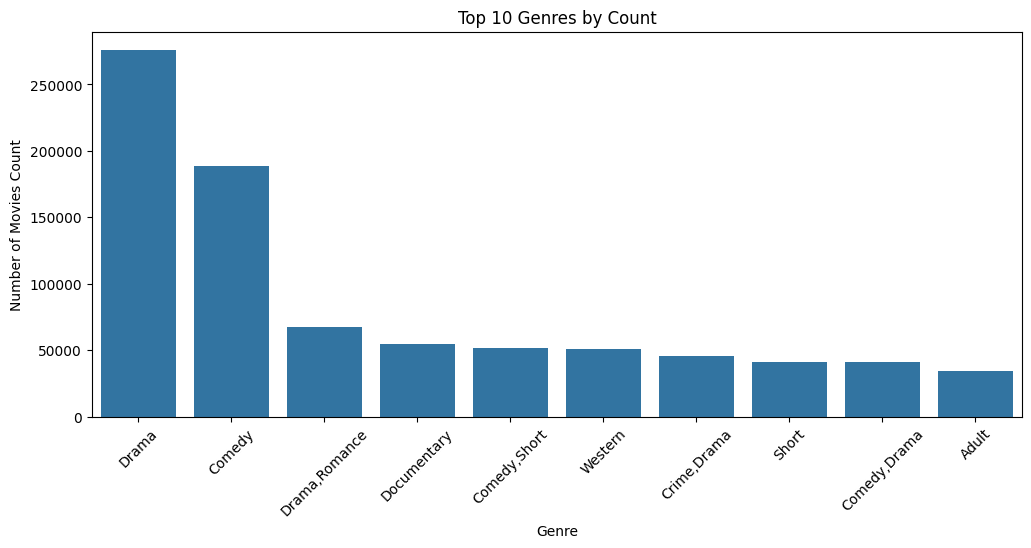

In [24]:
plt.figure(figsize=(12, 5))
genre_counts = merged_df['genres'].value_counts().nlargest(10)
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Top 10 Genres by Count")
plt.xlabel("Genre")
plt.ylabel("Number of Movies Count")
plt.xticks(rotation=45)
plt.show()

The above visualization is a **bar chart of the top 10 most common genres** in the dataset. The x-axis represents the **genres**, while the y-axis shows the **number of movies** in each genre. This helps us understand which genres are the most popular in terms of production. If a genre has a significantly higher count, it means it is widely produced, while lower counts indicate less common genres. The bars are sorted in descending order for better readability, and the **rotation of labels** ensures clarity.

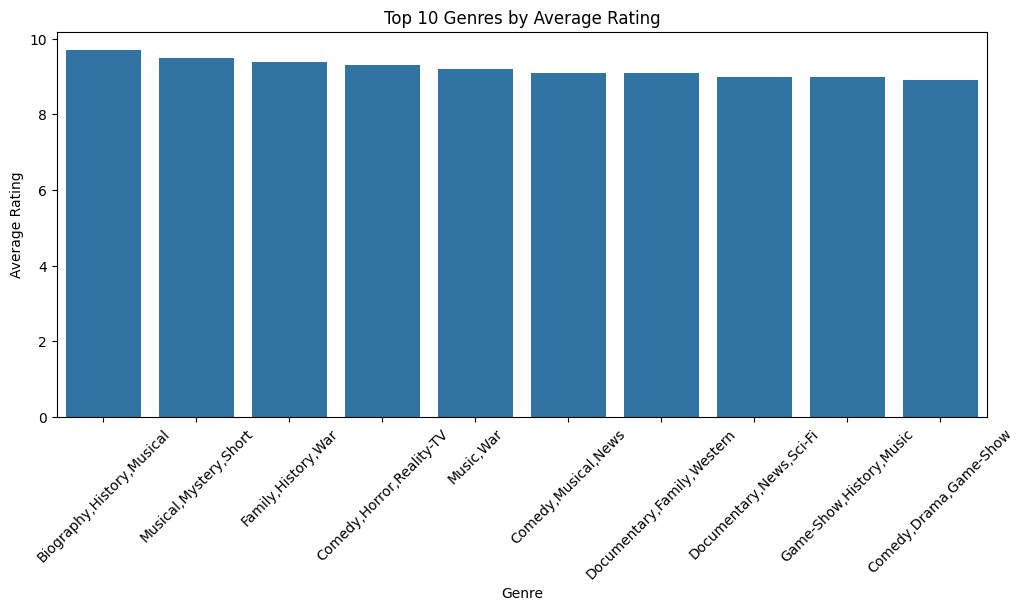

In [25]:
# Visualization 3: Average Rating by Genre
plt.figure(figsize=(12, 5))
genre_avg_rating = merged_df.groupby('genres')['averageRating'].mean().nlargest(10)
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values)
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

The above visualization is a **scatter plot of movie runtime vs. average rating**. The x-axis represents **runtime (minutes)**, and the y-axis shows the **average IMDb rating**. This helps analyze whether **longer movies tend to receive higher ratings** or if there’s no clear relationship. The plot uses **transparency (alpha)** to reduce clutter, making dense regions easier to interpret.

In [35]:
# 5. Distribution of Movies by Language (Top 10)
if 'language' in merged_df.columns:
    language_counts = merged_df['language'].value_counts().nlargest(10)
    plt.figure(figsize=(10, 5))
    plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm'))
    plt.title("Top 10 Languages by Number of Movies")
    plt.show()
else:
    print("Column 'language' not found in the dataset.")


Column 'language' not found in the dataset.


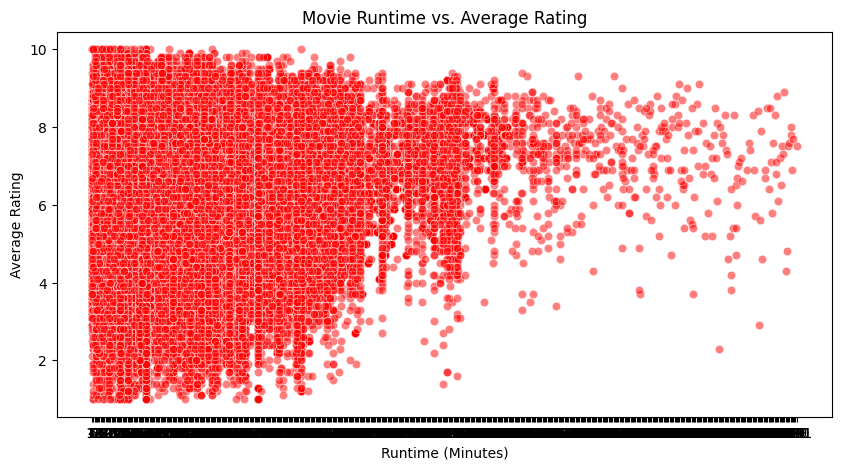

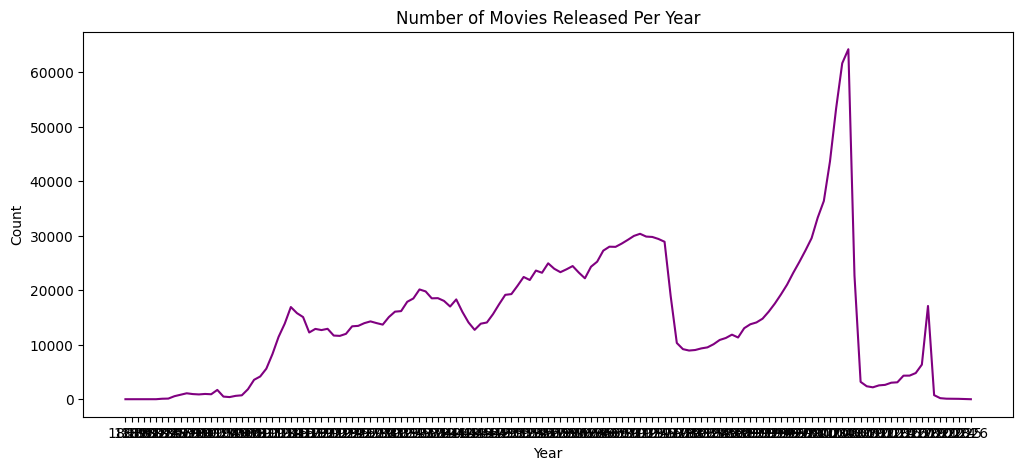

C:\Users\sushe\AppData\Local\Temp\ipykernel_20744\1561368396.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')


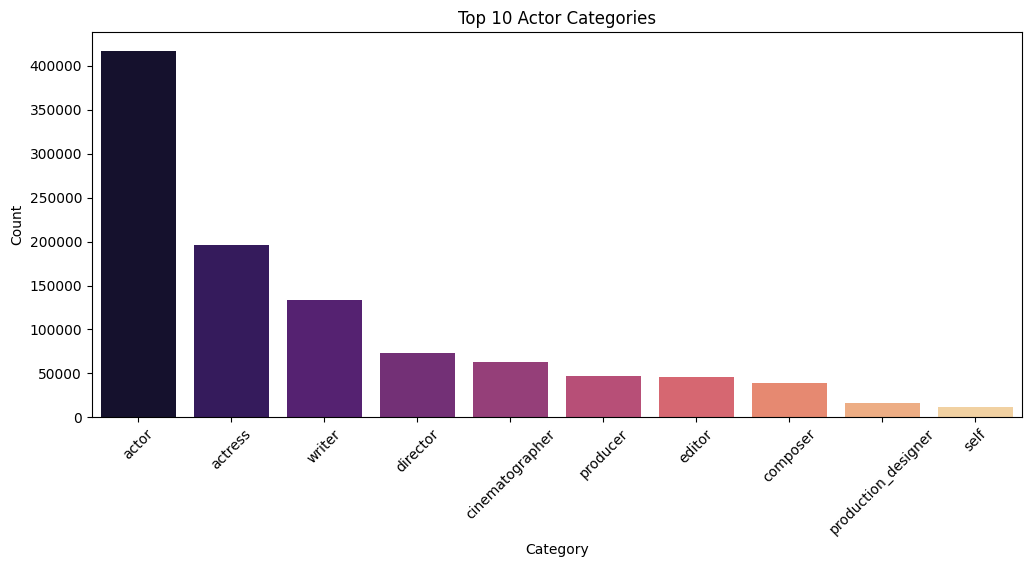

In [36]:
# 6. Relationship Between Runtime and Rating
plt.figure(figsize=(10, 5))
sns.scatterplot(x=merged_df['runtimeMinutes'], y=merged_df['averageRating'], alpha=0.5, color='red')
plt.title("Movie Runtime vs. Average Rating")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Average Rating")
plt.show()

# 7. Number of Movies Released per Year
plt.figure(figsize=(12, 5))
year_counts = merged_df['startYear'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, color='purple')
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 8. Most Popular Actor Categories
plt.figure(figsize=(12, 5))
category_counts = merged_df['category'].value_counts().nlargest(10)
sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')
plt.title("Top 10 Actor Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()